In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
from ipywidgets import interact
from pylab import *
import matplotlib.colors

In [62]:
#Ler o dataset
musicas = pd.read_csv('data.csv', index_col=False, squeeze=True, low_memory=False);
musicas.rename(columns={'Track Name':'TrackName'}, inplace=True)
musicas

,Position,TrackName,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [63]:
#Verificar se há alguma célula com valor negativo
musicas[(musicas['Streams'] < 0) | (musicas['Position'] < 0)]

,Position,TrackName,Artist,Streams,URL,Date,Region


In [64]:
#Eliminar valores negativos
musicas = musicas[(musicas['Streams'] > 0) & (musicas['Position'] > 0)]

In [65]:
# Verifica se há células nulas
result1 = len(musicas) - pd.isnull(musicas.Position).count()
result2 = len(musicas) - pd.isnull(musicas.TrackName).count()
result3 = len(musicas) - pd.isnull(musicas.Artist).count()
result4 = len(musicas) - pd.isnull(musicas.Streams).count()
result5 = len(musicas) - pd.isnull(musicas.URL).count()
result6 = len(musicas) - pd.isnull(musicas.Date).count()
result7 = len(musicas) - pd.isnull(musicas.Region).count()

resultado = result1 + result2 + result3 + result4 + result5 + result6 + result7
print("Quantidade de celulas nulas: ", resultado)

Quantidade de celulas nulas:  0


In [66]:
# Eliminar células com campos vazios
musicas.dropna(axis=0, subset=['Position'], inplace=True)
musicas.dropna(axis=0, subset=['TrackName'], inplace=True)
musicas.dropna(axis=0, subset=['Artist'], inplace=True)
musicas.dropna(axis=0, subset=['Streams'], inplace=True)
musicas.dropna(axis=0, subset=['URL'], inplace=True)
musicas.dropna(axis=0, subset=['Date'], inplace=True)
musicas.dropna(axis=0, subset=['Region'], inplace=True)

musicas

,Position,TrackName,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [67]:
#Eliminar ruídos nos nomes das músicas e artistas
def corrigir (nome):
    nome = nome.replace('#', '').replace('$', 's').replace('*', '')
    return nome

musicas.Artist = musicas.Artist.apply(corrigir)
musicas.TrackName = musicas.TrackName.apply(corrigir)

musicas

,Position,TrackName,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [68]:
# Tira os espaços em branco do começo e fim da String, para evitar que as mesmas sejam diferenciadas

musicas['TrackName'] = musicas['TrackName'].str.strip()
musicas['Artist'] = musicas['Artist'].str.strip()
musicas['URL'] = musicas['URL'].str.strip()
musicas['Date'] = musicas['Date'].str.strip()
musicas['Region'] = musicas['Region'].str.strip()

In [69]:
# Tranforma as datas em dias transcorridos para facilitar na manipulação

print ("Primeira Data: {}\nÚltima Data: {}".format(musicas.Date.min(),musicas.Date.max())) # Verifica primeira e última data
Dates = pd.to_datetime(musicas.Date) # Verifica o formato da data
Days = Dates.sub(Dates[0], axis = 0) # Subtrai resultados redundantes
Days = Days / np.timedelta64(1, 'D') # converte para Float
print ("Primeiro Dia: {}\nÚltimo Dia: {}".format(Days.min(), Days.max())) # check converted first and last days elapsed
musicas['Days'] = Days # Adiciona a nova coluna com Float's ao dataframe
# musicas.drop('Date', axis = 1, inplace = True)

Primeira Data: 2017-01-01
Última Data: 2018-01-09
Primeiro Dia: 0.0
Último Dia: 373.0


In [70]:
musicas['Year'] = musicas.Date.str[:4]
musicas['Month'] = musicas.Date.str[5:7]

In [71]:
# Cálculos estatísticos com base na coluna "Streams" utilizando a função describe()

musicas['Streams'].describe()

count    3.440540e+06
mean     5.188452e+04
std      2.017733e+05
min      1.001000e+03
25%      3.321000e+03
50%      9.226000e+03
75%      2.965600e+04
max      1.138152e+07
Name: Streams, dtype: float64

In [72]:
#Verificar a quantidade de músicas distintas no dataset
Nomes = musicas['TrackName']
totalNomes = len(Nomes.value_counts())
print( "O total de nome de musicas distintas é de : ", totalNomes)
print("E o tamanho do nosso dataset é de ", len(musicas), "linhas (musicas)")

O total de nome de musicas distintas é de :  18596
E o tamanho do nosso dataset é de  3440540 linhas (musicas)


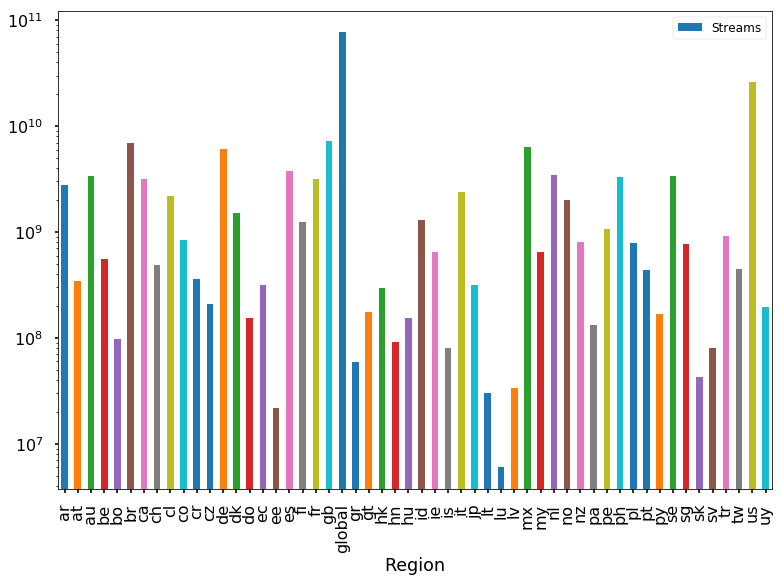

In [73]:
#Quantidade de Streams por região
paises = musicas.groupby('Region')
paises_sum = paises.sum()
paises_sum['Streams'].plot(kind='bar')
plt.yscale('log')
plt.rcParams['figure.figsize'] = (18,8)
plt.legend(loc='upper right', prop={'size':12}, fontsize=1)
plt.show()

In [74]:
#Quantidade de Streams por Dia/Data

dias = musicas.groupby(['Days', 'Date'])
dias_sum = dias.sum()

dias_sum


,,Position,Streams
Days,Date,,
0.0,2017-01-01,803149,342686592
1.0,2017-01-02,807405,351583304
2.0,2017-01-03,811271,375805417
3.0,2017-01-04,817945,383073683
4.0,2017-01-05,823959,385834107
5.0,2017-01-06,834395,411766324
6.0,2017-01-07,834050,403181983
7.0,2017-01-08,805740,368211987
8.0,2017-01-09,822088,395267552


In [75]:
#Quantidade de Streams por mês
meses = musicas.groupby(['Year', 'Month'])
meses_sum = meses.sum()
meses_sum

Position      Streams         Days
Year Month                                    
2017 01     25766541  12660800375    4170319.0
     02     23818050  12286996626   11315713.0
     03     26818321  15546962685   21159215.0
     04     25679946  14595379550   28679503.0
     05     25130590  14518179433   35921688.0
     06     25335169  14236643511   44741773.0
     07     27425683  14824623820   56906872.0
     08     27549562  14619134413   65700348.0
     09     26828441  14820585163   72121420.0
     10     27635382  15063737807   83426021.0
     11     26888651  14664173365   89226206.0
     12     28635423  16387348074  103870605.0
2018 01      8142914   4286203470   31260075.0

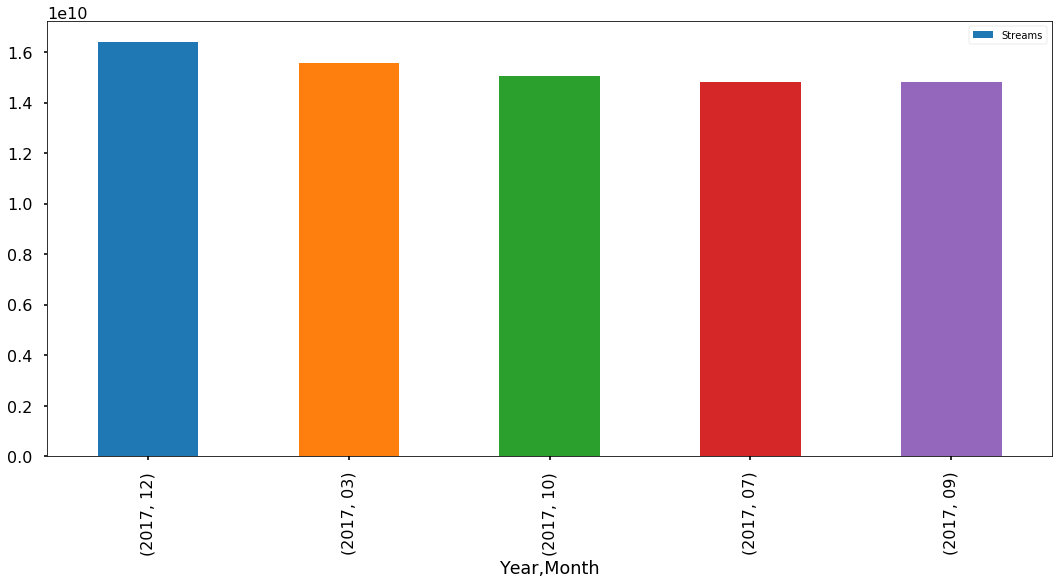

In [76]:
#Ranking dos 5 meses com mais Streams
meses_sum['Streams'].sort_values(ascending=False).head().plot(kind='bar')
plt.rcParams['figure.figsize'] = (4,2)
plt.legend(loc='upper right', prop={'size':10}, fontsize=5)
plt.show()

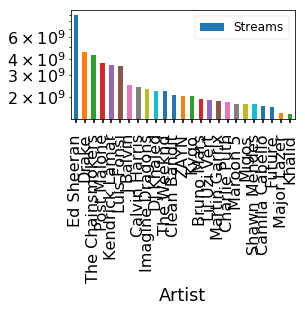

In [77]:
#Ranking dos 25 artistas mais acessados
artistas = musicas.groupby('Artist')
artistas_soma = artistas.Streams.sum()

#Cria um novo dataframe para manipulação
contStreams=pd.DataFrame(artistas_soma)
contStreamsM = contStreams.Streams.sort_values(ascending=False)
contStreamsM = contStreamsM[:25]

contStreamsM.plot(kind='bar')
plt.rcParams['figure.figsize'] = (18,8)
plt.legend(loc='upper right', prop={'size':12}, fontsize=1)
plt.yscale('log')
plt.show()

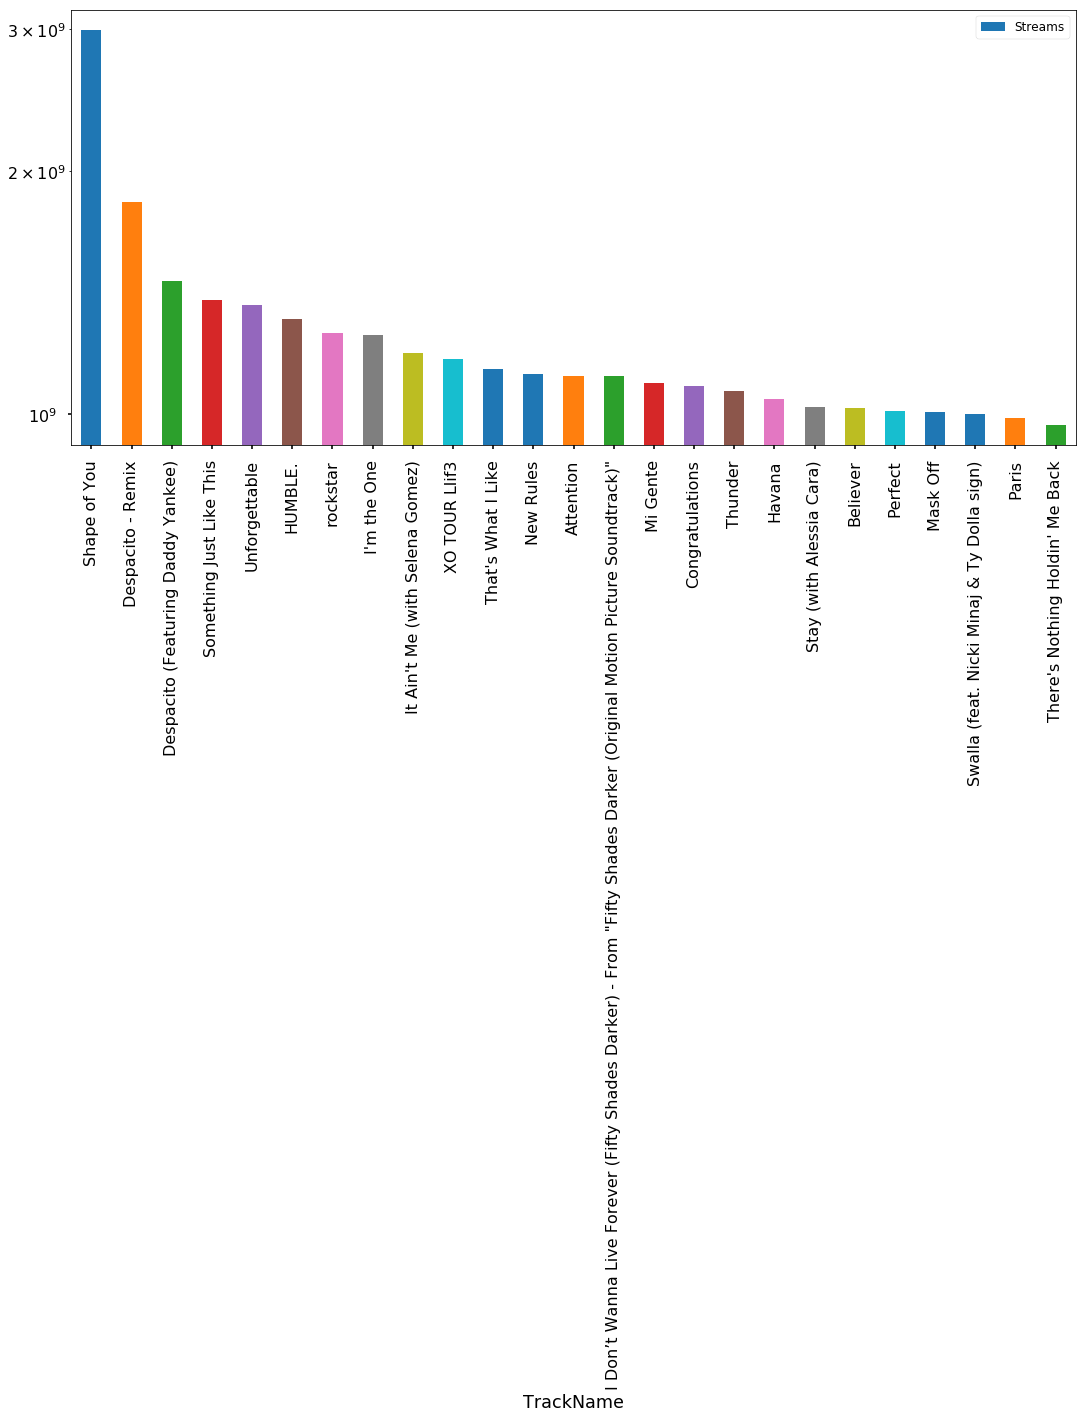

In [78]:
#Ranking das 25 músicas mais acessadas
musicas_mais = musicas.groupby('TrackName')
musicas_mais_soma = musicas_mais.Streams.sum()

#Cria um novo dataframe para manipulação
contMusics=pd.DataFrame(musicas_mais_soma)
contMusicsM = contMusics.Streams.sort_values(ascending=False)
contMusicsM = contMusicsM[:25]

contMusicsM.plot(kind='bar')
plt.rcParams['figure.figsize'] = (18,8)
plt.legend(loc='upper right', prop={'size':12}, fontsize=1)
plt.yscale('log')
plt.show()

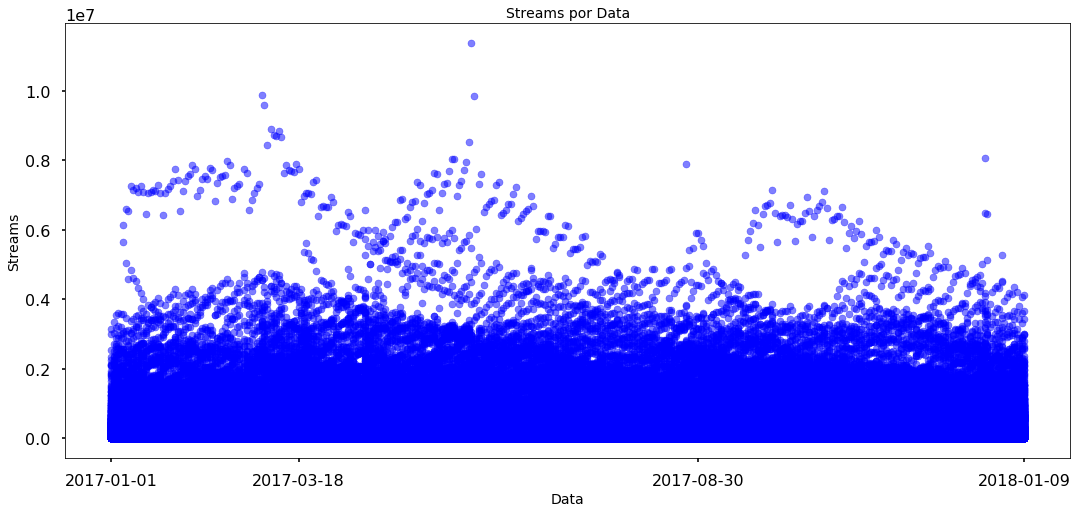

In [79]:
fig = gcf()
ax = fig.gca()
plt.style.use('seaborn-poster')

y = musicas['Streams']
x = musicas['Date'] 

plt.title('Streams por Data', fontsize='14')
plt.xlabel('Data', fontsize='14')
plt.ylabel('Streams', fontsize='14')


#plt.rcParams['figure.figsize'] = (100,18)
#plt.plot(x, y ,'o',color='blue');
plt.scatter(x, y ,color='blue',s=50, alpha=.5 );

xmarks=['2017-01-01','2017-03-18','2017-08-30','2018-01-09'] # 5 registros
plt.xticks(xmarks)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = '2017-01-01'
labels[1] = '2017-03-18'
labels[2] = '2017-08-30'
labels[3] = '2018-01-09'
ax.set_xticklabels(labels)

plt.savefig('StreamsPorData.png') 

In [137]:
#Ranking dos 50 musicas mais acessadas, com seus artistas
artistas_mus = musicas.groupby(['Artist', 'TrackName'])
artistas_mus = artistas_mus.Streams.sum()
artistas_mus
#Cria um novo dataframe para manipulação
artistas_musf=pd.DataFrame(artistas_mus)
artistas_musf = artistas_musf.Streams.sort_values(ascending=False)
artistas_musf = artistas_musf[:50]
art = artistas_musf.reset_index()
art

,Artist,TrackName,Streams
0,Ed Sheeran,Shape of You,2993988783
1,Luis Fonsi,Despacito - Remix,1829621841
2,Luis Fonsi,Despacito (Featuring Daddy Yankee),1460802540
3,The Chainsmokers,Something Just Like This,1386258295
4,Kendrick Lamar,HUMBLE.,1311243745
5,French Montana,Unforgettable,1289150890
6,Post Malone,rockstar,1260181617
7,DJ Khaled,I'm the One,1254196301
8,Kygo,It Ain't Me (with Selena Gomez),1190339348
9,Lil Uzi Vert,XO TOUR Llif3,1171827725


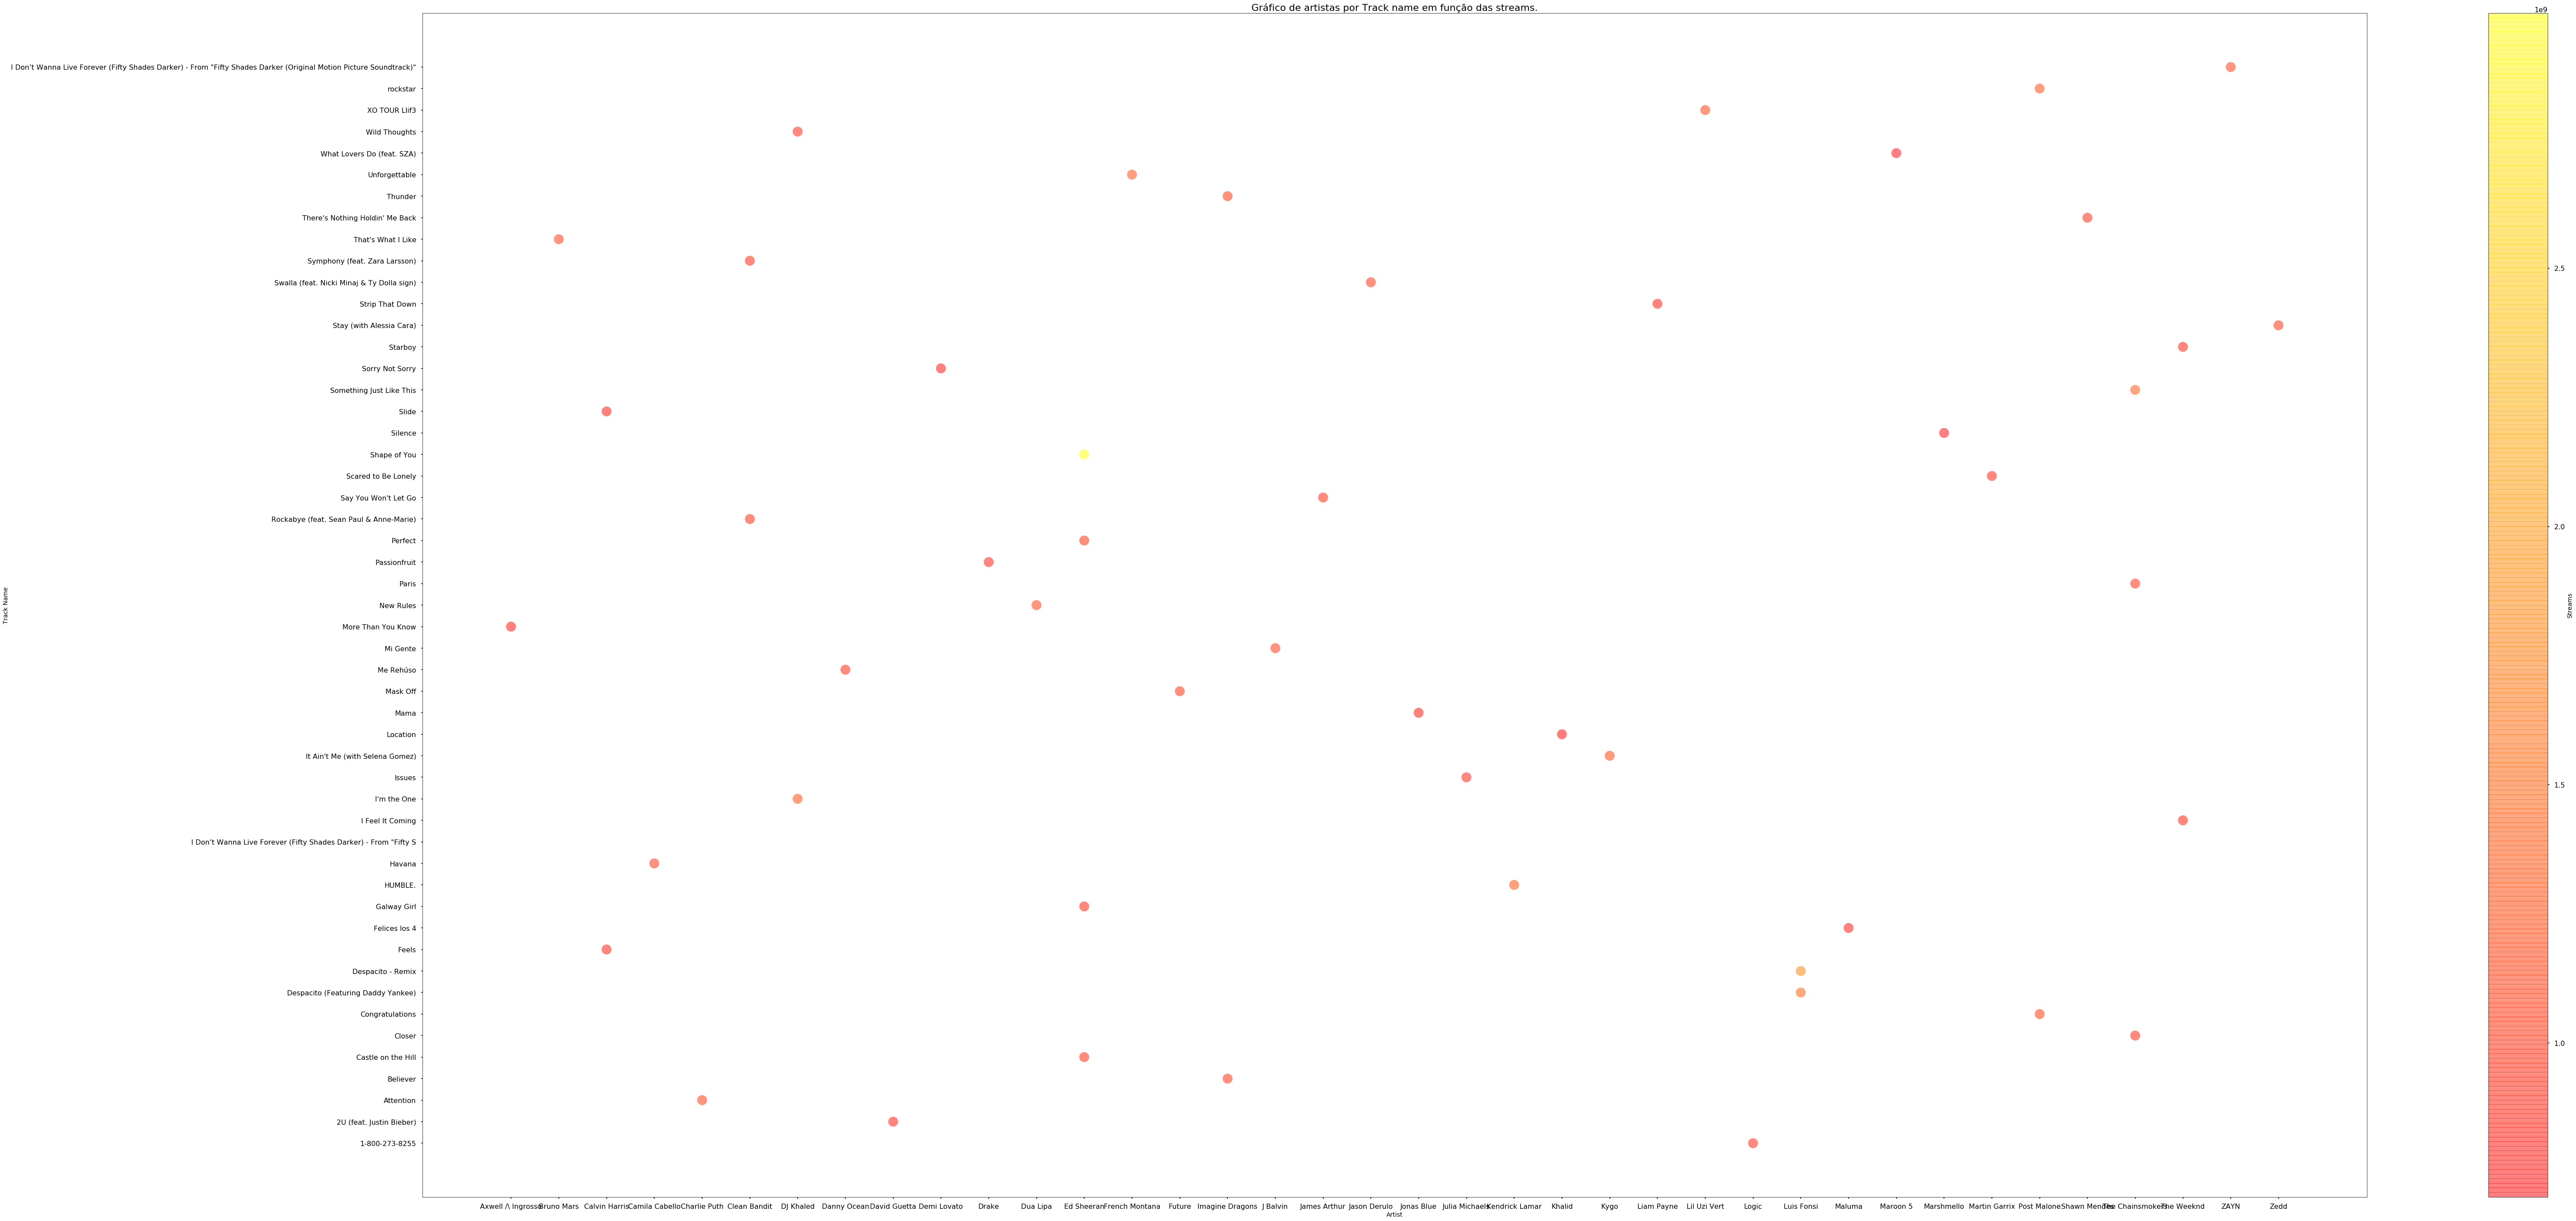

In [164]:
fig = gcf()
ax = fig.gca()
plt.style.use('seaborn-poster')

X = art['Artist']
Y = art['TrackName']
C = art['Streams']

plt.rcParams['figure.figsize'] = (100,50)

#cmap = mpl.colors.ListedColormap([ 'tab:red', 'tab:orange',  'tab:red'])


s = ax.scatter(X,Y,c=C,lw=0.3, s=500, alpha=0.5,  cmap='autumn') #plasma,hsv  'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'autumn']

plt.title('Gráfico de artistas por Track name em função das streams.', fontsize='22')
plt.ylabel('Track Name', fontsize='14')
plt.xlabel('Artist', fontsize='14')


#norm = mpl.colors.Normalize(vmin=1, vmax=20)
cb = plt.colorbar(s)

cb.set_label('Streams', fontsize='14')


plt.savefig('ArtistasPorStreamsCores.png') 